In [1]:
import pandas as pd
import os
from datetime import datetime, date
import numpy as np
from math import atan, pi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

#import ptitprince as pt

#import warnings
#warnings.filterwarnings('ignore')

## Load Data

In [2]:
dir_ = "/home/reinhold/Daten/Paper_Datasets_Nov2022"
filenames = [r'OpenAPS complete_patient_statistics.xlsx',
    r'OPENonOH complete_patient_statistics.xlsx'] # Specify the file path

columns_ = ["gender", "age","height", "weight", "TOR<70", "TIR", "TOR>180", "bg_roc_stds"] # "dailyInsulinUnits", "dailyBasalInsulinUnits", "dailyCarbs" missing

df = {}
df["OpenAPS"] = pd.read_excel(os.path.join(dir_, filenames[0]))  # all columns
df["OpenAPS"] = df["OpenAPS"].loc[:, columns_]  

df["OPENonOH"] = pd.read_excel(os.path.join(dir_, filenames[1]))
print(len(df["OPENonOH"].columns), df["OPENonOH"].columns)
df["OPENonOH"] = df["OPENonOH"].loc[:, columns_]

27 Index([         'id',         'age',      'gender',      'height',
            'weight',     'country',        'year',       'month',
        'interdaysd',  'interdaycv', 'bg_roc_stds',      'TOR<70',
               'TIR',     'TOR>180',         'POR',     'J_index',
              'LGBI',        'HBGI',         'GMI',       'count',
              'mean',         'std',         'min',          0.25,
                 0.5,          0.75,         'max'],
      dtype='object')


In [3]:
#df["OpenAPS"].info()
#df.index = pd.to_datetime(df_raw["Timestamp"], format='%m/%d/%Y %H:%M:%S')

#df["OpenAPS"].head(2)
df["OpenAPS"].columns

Index(['gender', 'age', 'height', 'weight', 'TOR<70', 'TIR', 'TOR>180',
       'bg_roc_stds'],
      dtype='object')

In [4]:
df["OPENonOH"].info()
df["OPENonOH"].head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       75 non-null     object 
 1   age          66 non-null     float64
 2   height       66 non-null     float64
 3   weight       65 non-null     float64
 4   TOR<70       75 non-null     float64
 5   TIR          75 non-null     float64
 6   TOR>180      75 non-null     float64
 7   bg_roc_stds  75 non-null     float64
dtypes: float64(7), object(1)
memory usage: 4.8+ KB


,gender,age,height,weight,TOR<70,TIR,TOR>180,bg_roc_stds
0,Female,NaN,180.00,80.0,3.24,78.11,18.65,1.533459
1,Female,28.0,157.48,75.0,7.78,66.77,25.45,1.613297


## Figure 4: BG ROC STDS

0.606594198071824 2.68779125343826
0.756135904 2.289724938
0.61 2.85
[0.61 0.89 1.17 1.45 1.73 2.01 2.29 2.57]


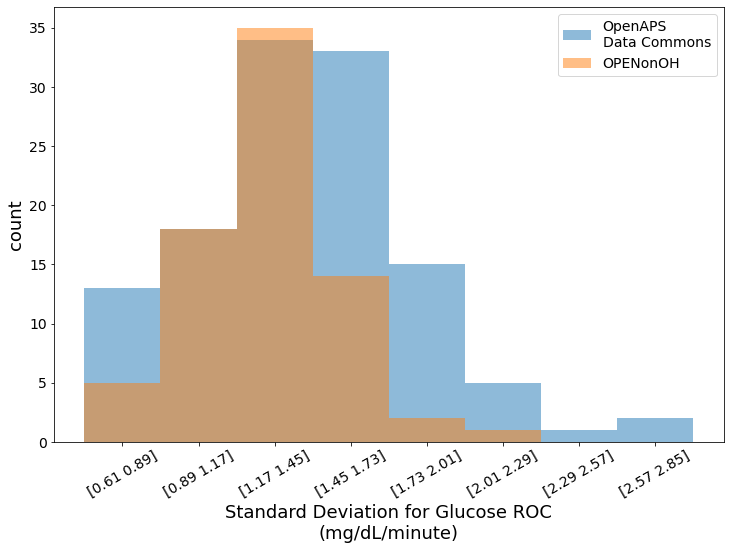

In [5]:
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

print(min(df["OpenAPS"]["bg_roc_stds"]), max(df["OpenAPS"]["bg_roc_stds"]))
print(min(df["OPENonOH"]["bg_roc_stds"]), max(df["OPENonOH"]["bg_roc_stds"]))

# since min, max are positive, just add/subtract 1 %
min_ = 0.99*min(min(df["OpenAPS"]["bg_roc_stds"]), min(df["OPENonOH"]["bg_roc_stds"]))
max_ = 1.01*max(max(df["OpenAPS"]["bg_roc_stds"]), max(df["OPENonOH"]["bg_roc_stds"]))
min_, max_ = 0.61, 2.85

print(min_, max_)
print(np.arange(min_, max_, 0.28))
plt.figure(figsize=(12, 8))
plt.hist(df["OpenAPS"]["bg_roc_stds"], bins=np.linspace(min_, max_, 9), alpha=0.5, label='OpenAPS\nData Commons')
plt.hist(df["OPENonOH"]["bg_roc_stds"], bins=np.linspace(min_, max_, 9), alpha=0.5, label='OPENonOH')
lower_bin_edges = np.linspace(min_, max_, 9)[:-1]
upper_bin_edges = np.linspace(min_, max_, 9)[1:]

plt.legend(loc='upper right')
plt.xticks(ticks=lower_bin_edges + 0.28/2, labels=[f"[{l:0.2f} {u:0.2f}]" for l, u in zip(lower_bin_edges, upper_bin_edges)], rotation=30)
#x axis labels
plt.xlabel('Standard Deviation for Glucose ROC\n(mg/dL/minute)')
plt.ylabel("count")

#plt.tight_layout()
plt.savefig("std_bg_ROC.png")

## Feature correlations and distributions
### Figure 2 a) correlation matrix (bottom left: OPENonOH, top right: OpenAPS)

age            0
height         0
weight         0
TOR<70         0
TIR            0
TOR>180        0
bg_roc_stds    0
dtype: int64
age            0
height         0
weight         0
TOR<70         0
TIR            0
TOR>180        0
bg_roc_stds    0
dtype: int64
[[ 1.          0.26536376  0.38413418  0.15972357 -0.01639356 -0.03450939
   0.02749895]
 [ 0.26536376  1.          0.49503989 -0.00494255 -0.15412476  0.14430718
   0.21657318]
 [ 0.38413418  0.49503989  1.          0.15899142 -0.10553175  0.04819533
   0.18201441]
 [ 0.15972357 -0.00494255  0.15899142  1.          0.07687624 -0.38248172
  -0.04302712]
 [-0.01639356 -0.15412476 -0.10553175  0.07687624  1.         -0.95063233
  -0.53124016]
 [-0.03450939  0.14430718  0.04819533 -0.38248172 -0.95063233  1.
   0.50566766]
 [ 0.02749895  0.21657318  0.18201441 -0.04302712 -0.53124016  0.50566766
   1.        ]] [[ 1.          0.17554509  0.05294952 -0.24917325  0.34892674 -0.2669838
  -0.25618894]
 [ 0.17554509  1.          0.443

Text(1, 1, 'OpenAPS')

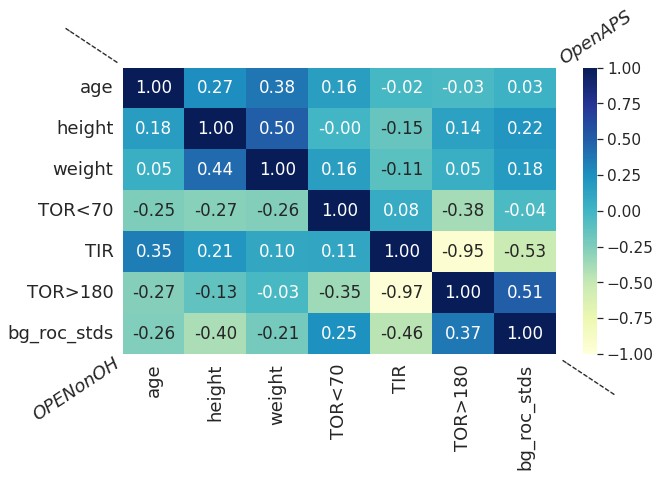

In [12]:
#dfcorr = df[[
#    'age', 'height', 'weight', 'dailyCarbs', 'dailyInsulinUnits',
#    'dailyBasalInsulinUnits'
#]]

columns_ = ["age","height", "weight", "TOR<70", "TIR", "TOR>180", "bg_roc_stds"]  # without "gender"

dfcorr = df["OpenAPS"].copy()[columns_]
dfcorr = dfcorr.dropna(axis=0)
print(dfcorr.isnull().sum())
mat = {}  # correlation matrices, that are to be combined into one
mat["OpenAPS"] = dfcorr.corr().to_numpy()

dfcorr2 = df["OPENonOH"].copy()[columns_]
dfcorr2 = dfcorr2.dropna(axis=0)
print(dfcorr2.isnull().sum())
mat["OPENonOH"] = dfcorr2.corr().to_numpy()

print(mat["OpenAPS"], mat["OPENonOH"])

# combine the two correlation matrices
 
mat["combined"] = mat["OpenAPS"] 
for i in range(mat["combined"].shape[0]):  # iterate over rows
    for j in range(mat["combined"].shape[1]):  # iterate over columns
        if i>j: 
            mat["combined"][i][j] = mat["OPENonOH"][i][j]
# bottom left triangle: OPENonOH
# top right triangle: OpenAPS

mat["combined2"] = np.triu(mat["OpenAPS"], k=1) + np.tril(mat["OPENonOH"]) 

assert mat["combined"].all()==mat["combined2"].all()

df_combined = pd.DataFrame(mat["combined2"], columns=dfcorr.columns, index=dfcorr.columns)

sns.set(rc={'figure.figsize': (9.7, 5.27)})
sns.set(font_scale=1.4)
ax = sns.heatmap(df_combined, annot=True, fmt=".2f", cmap="YlGnBu", vmin=-1.0, vmax=1.0)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=18)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)
ax.tick_params(axis='x', rotation=90)

# get figure size
fig_size = plt.rcParams["figure.figsize"]
# get padding around figure
print(fig_size)
print(ax.bbox, ax.bbox.height, ax.bbox.width)
h, w = ax.bbox.height, ax.bbox.width
# draw line
#plt.axline([-0.1, -0.1], [1.1, 1.1], linewidth=2, color='r', clip_on=False)
plt.text(0, 1-0.01, "----------", horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes, fontsize=18, rotation = -np.arctan(h/w)*180/pi)
plt.text(1, 0+0.01, "----------", horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=18, rotation = -np.arctan(h/w)*180/pi)

plt.text(0, 0, "OPENonOH", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=18, fontstyle='italic', rotation = np.arctan(h/w)*180/pi)
plt.text(1, 1, "OpenAPS", horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, fontsize=18, fontstyle='italic', rotation = np.arctan(h/w)*180/pi)

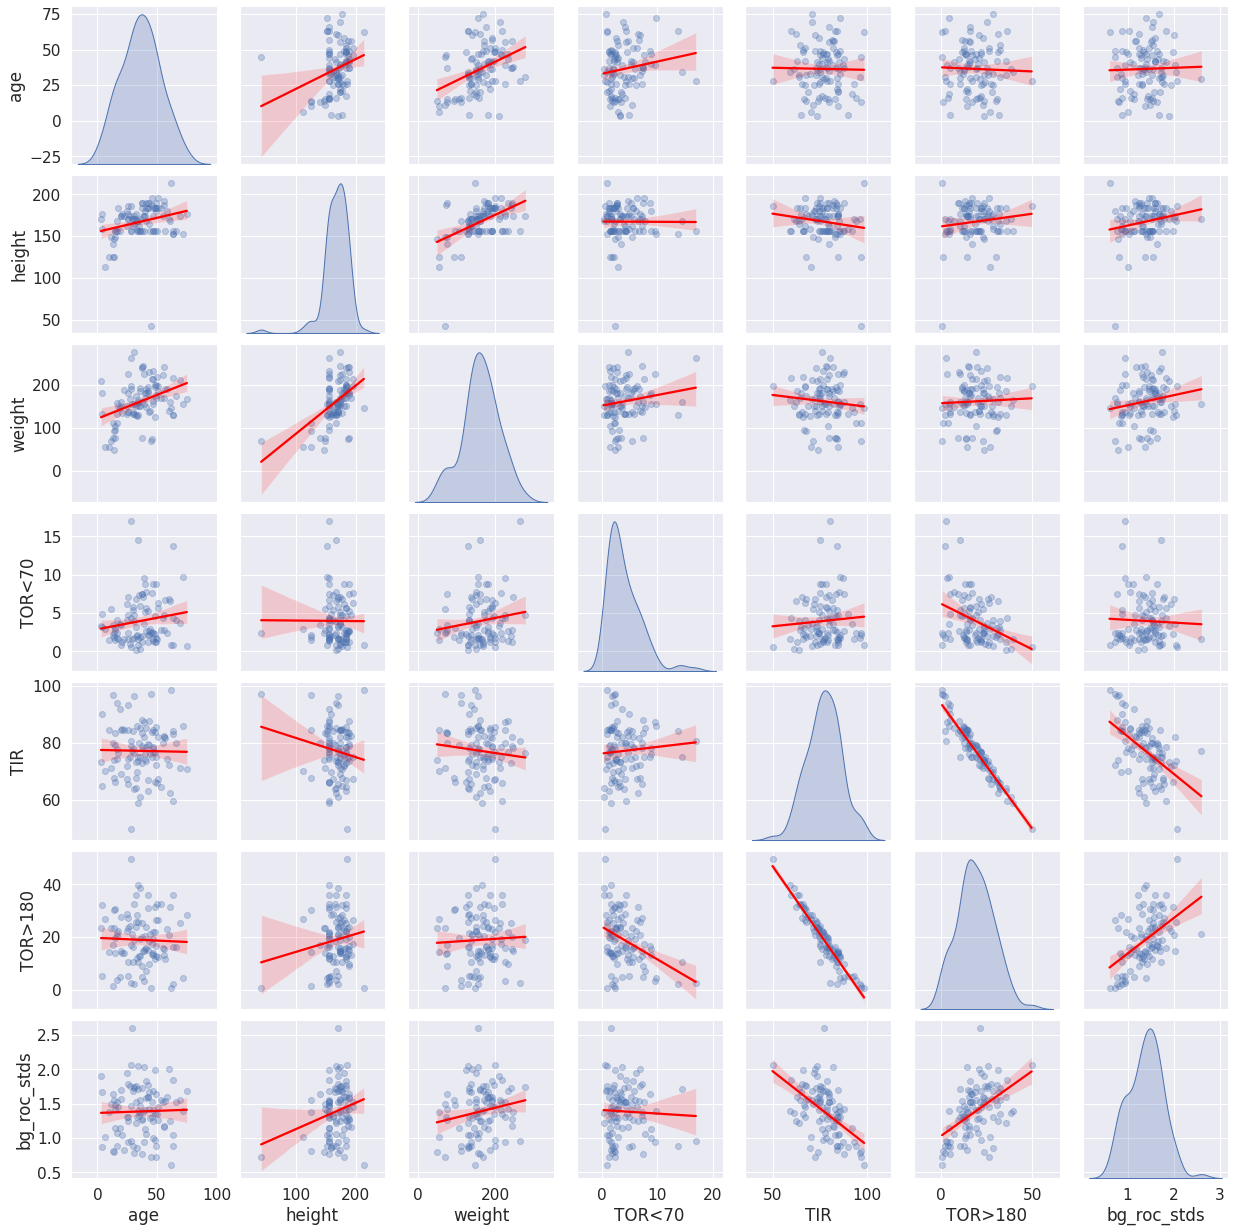

In [7]:
import seaborn as sns

sns.pairplot(dfcorr, diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})

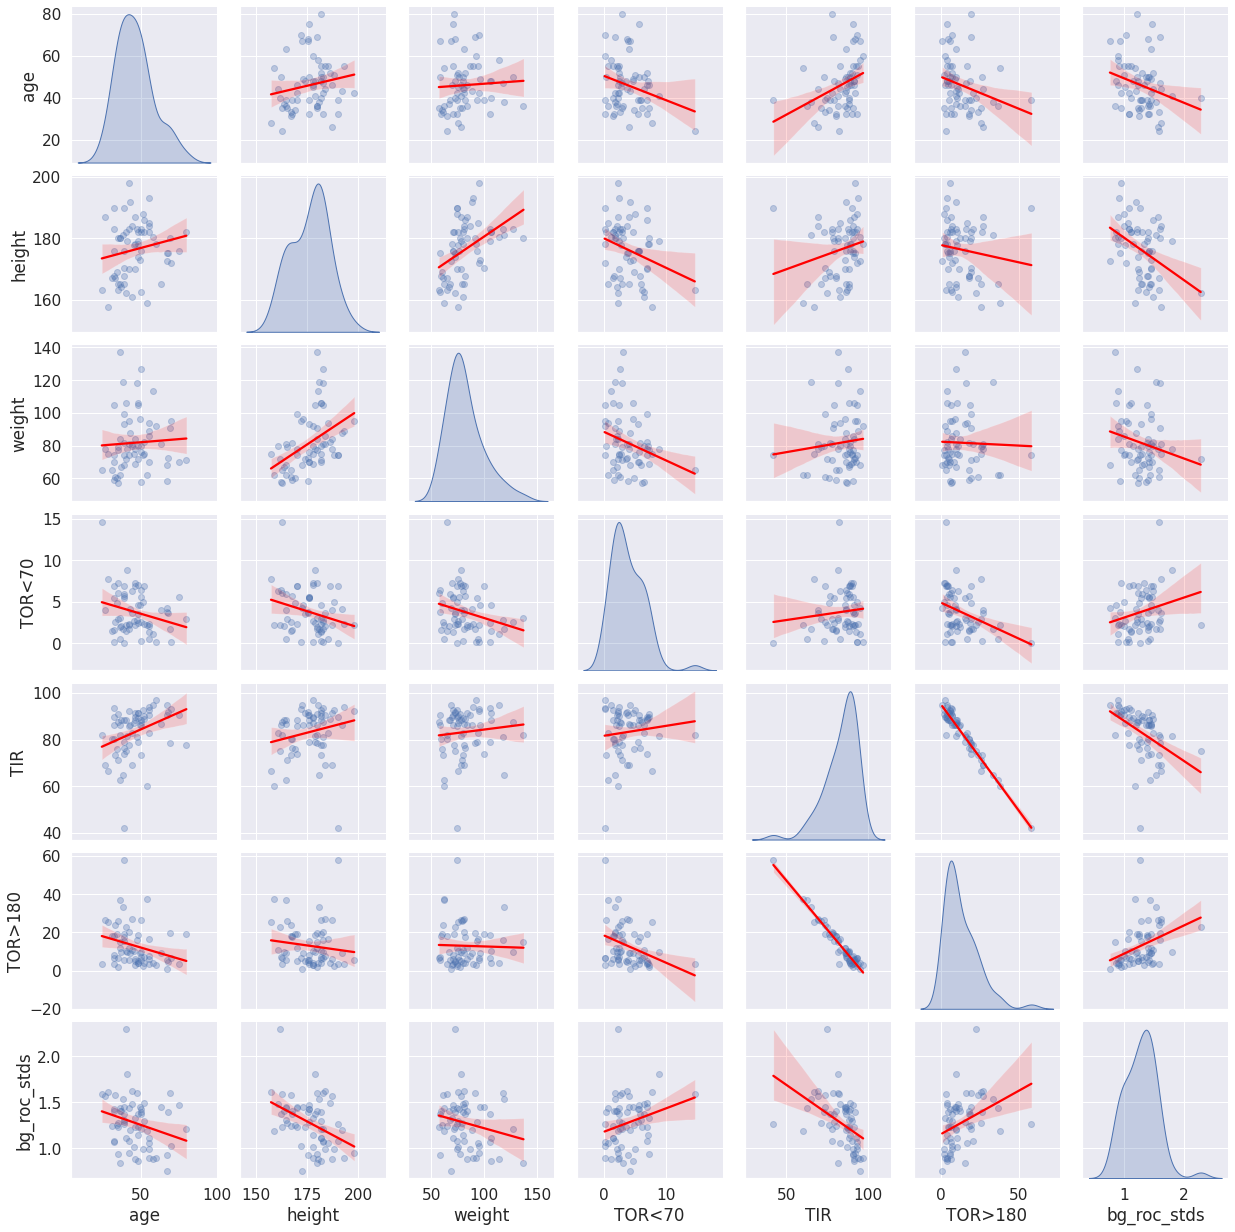

In [13]:
sns.pairplot(dfcorr2, diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})

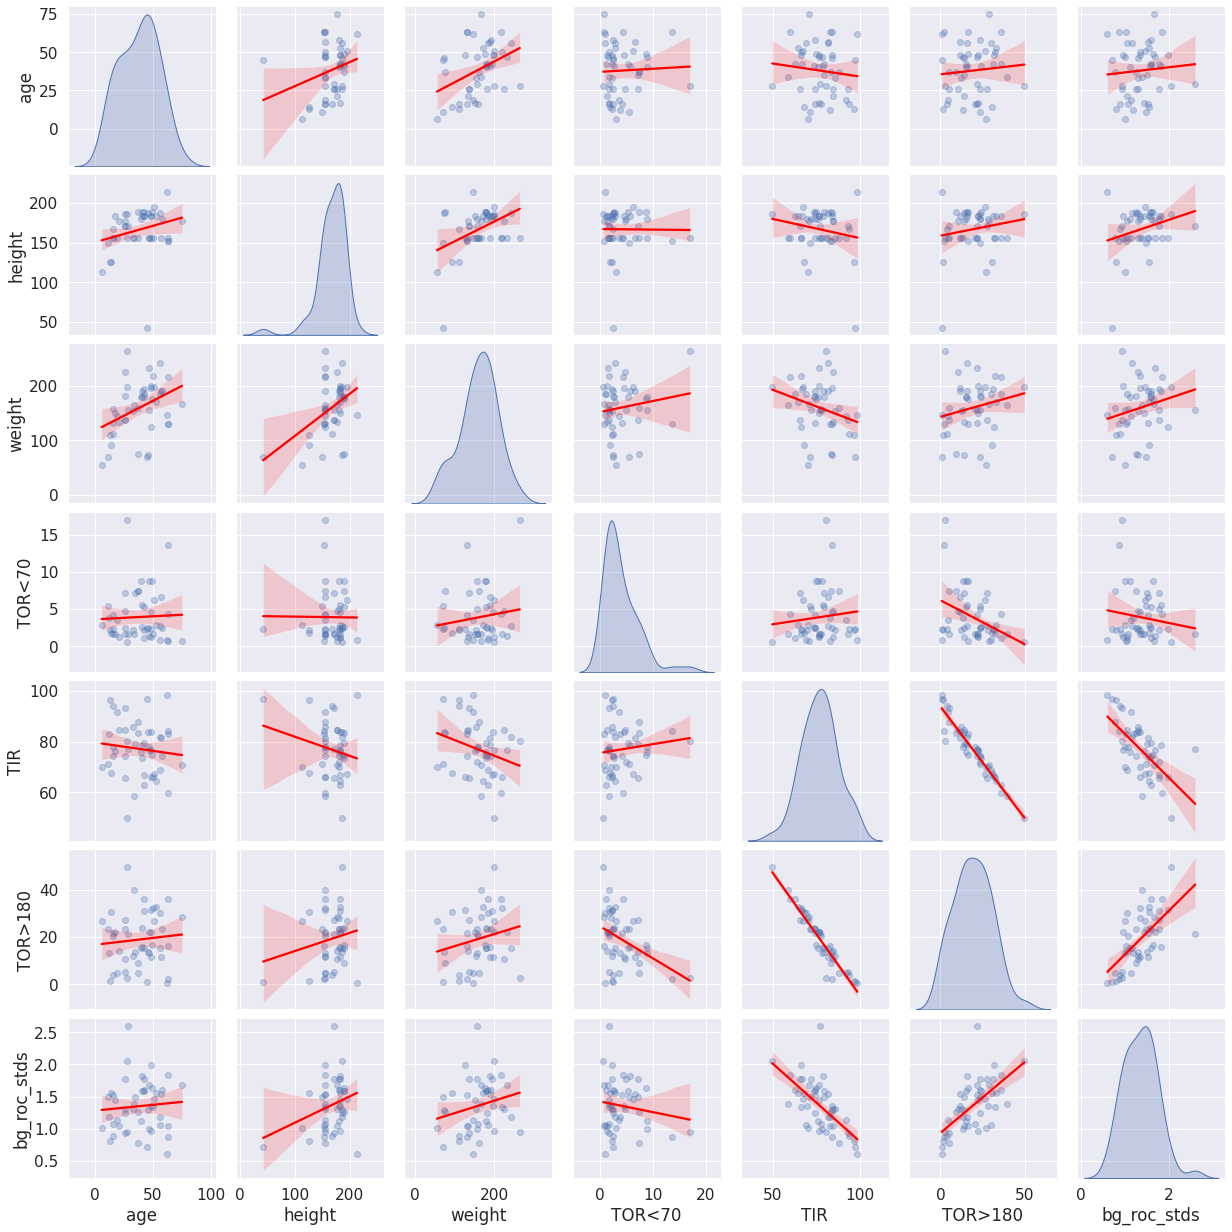

In [9]:
sns.pairplot(df["OpenAPS"][df["OpenAPS"]["gender"]=="Male"], diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})

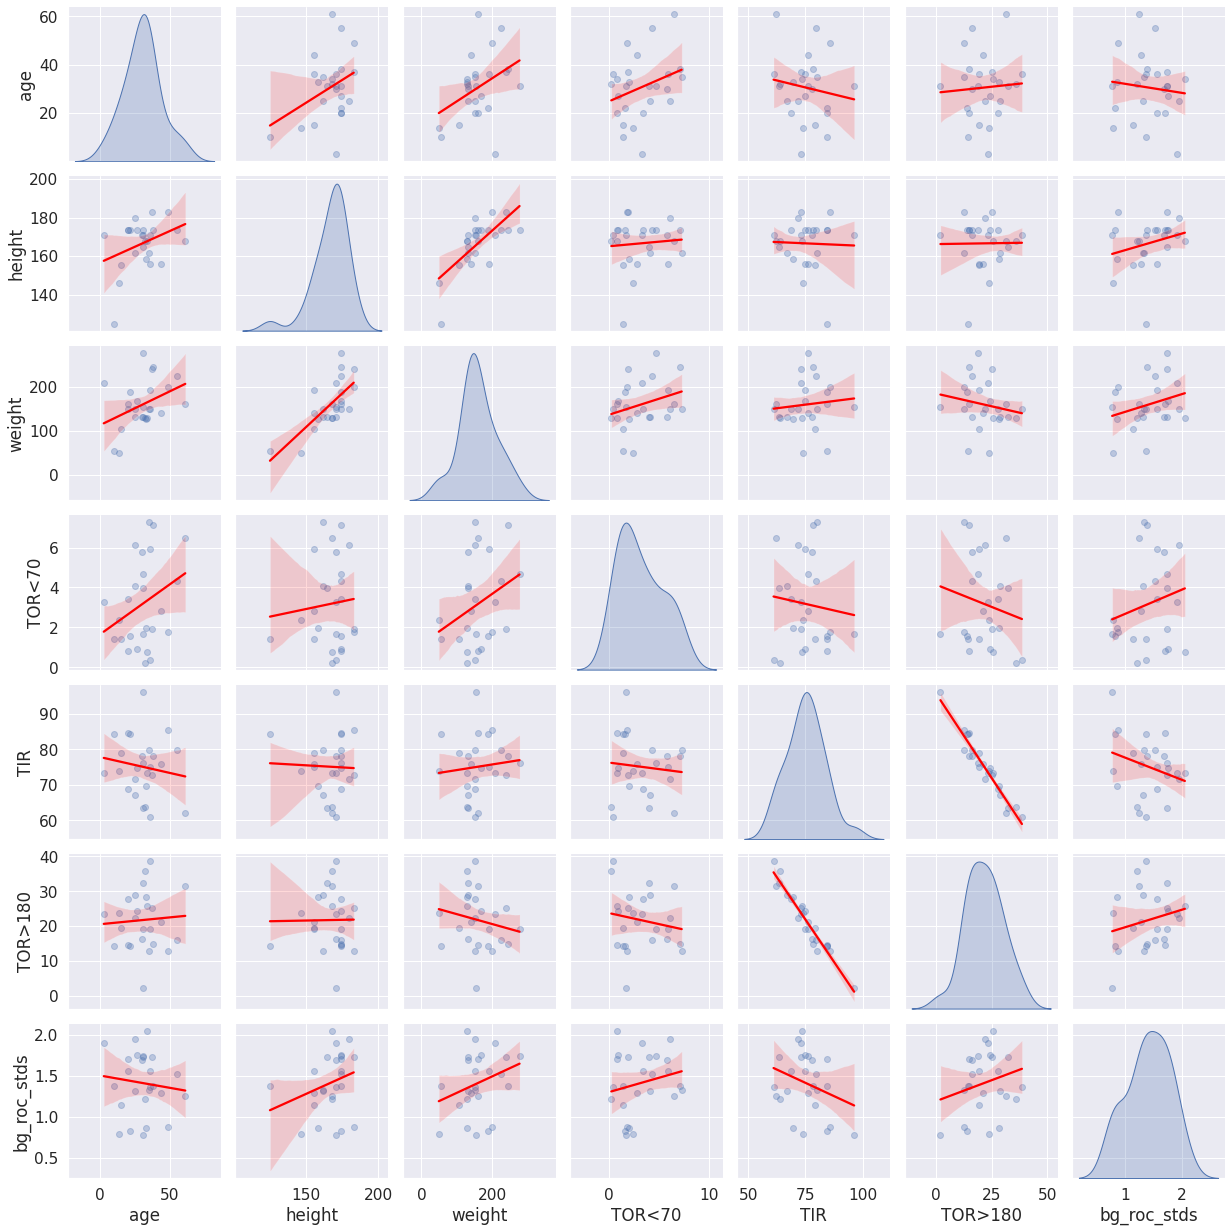

In [ ]:
sns.pairplot(df["OpenAPS"][df["OpenAPS"]["gender"]=="Female"], diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})

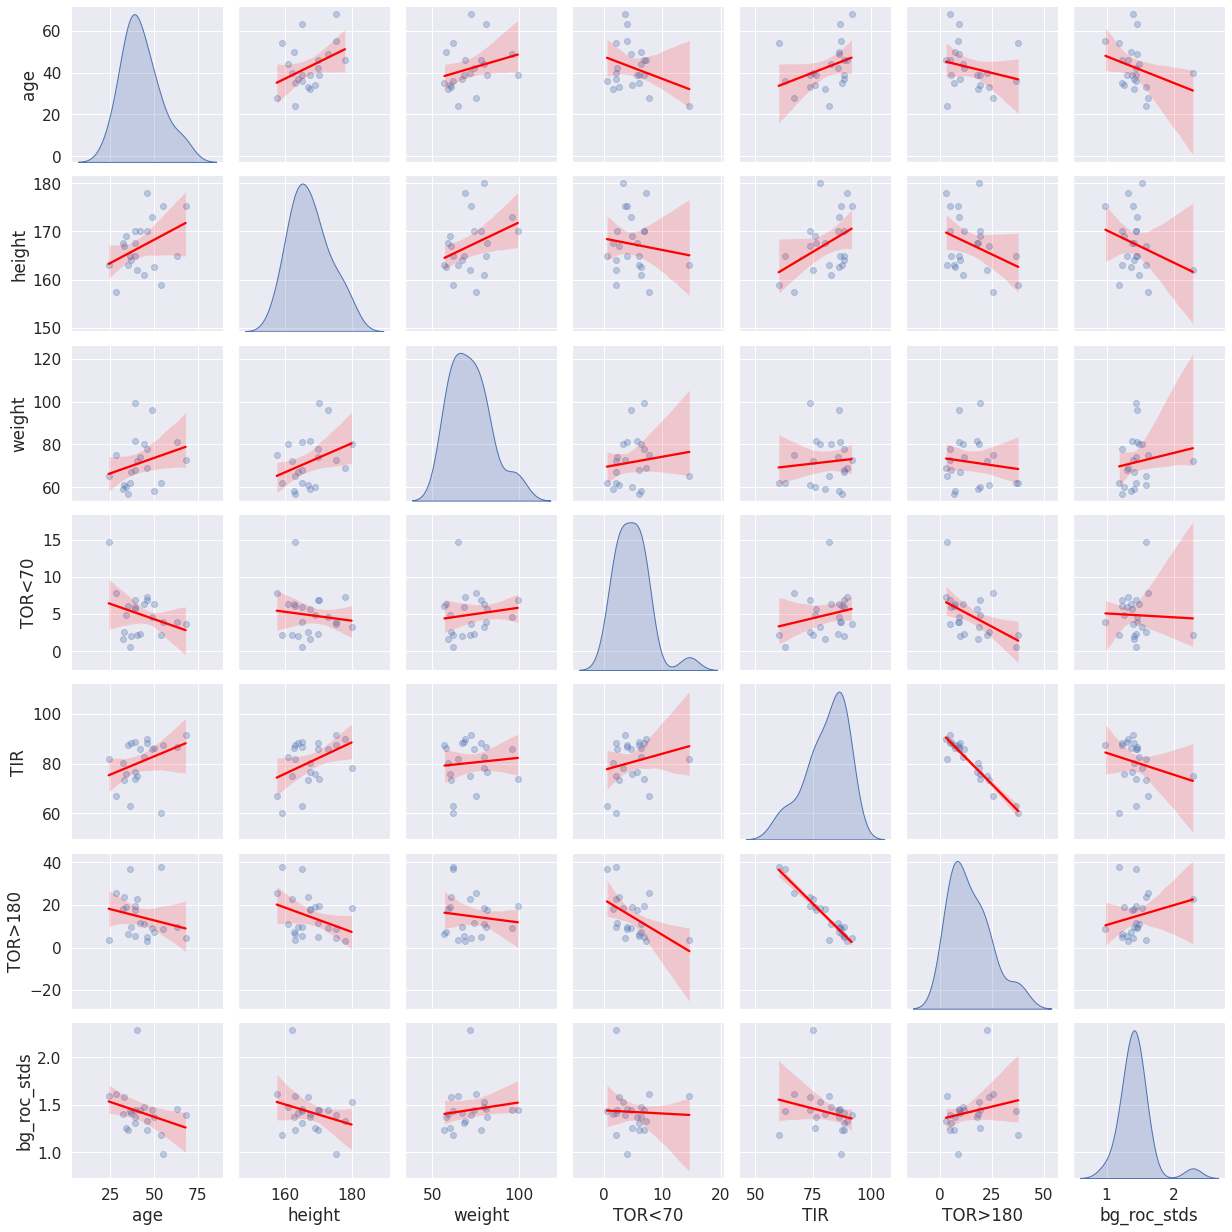

In [11]:
sns.pairplot(df["OPENonOH"][df["OPENonOH"]["gender"]=="Female"], diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})

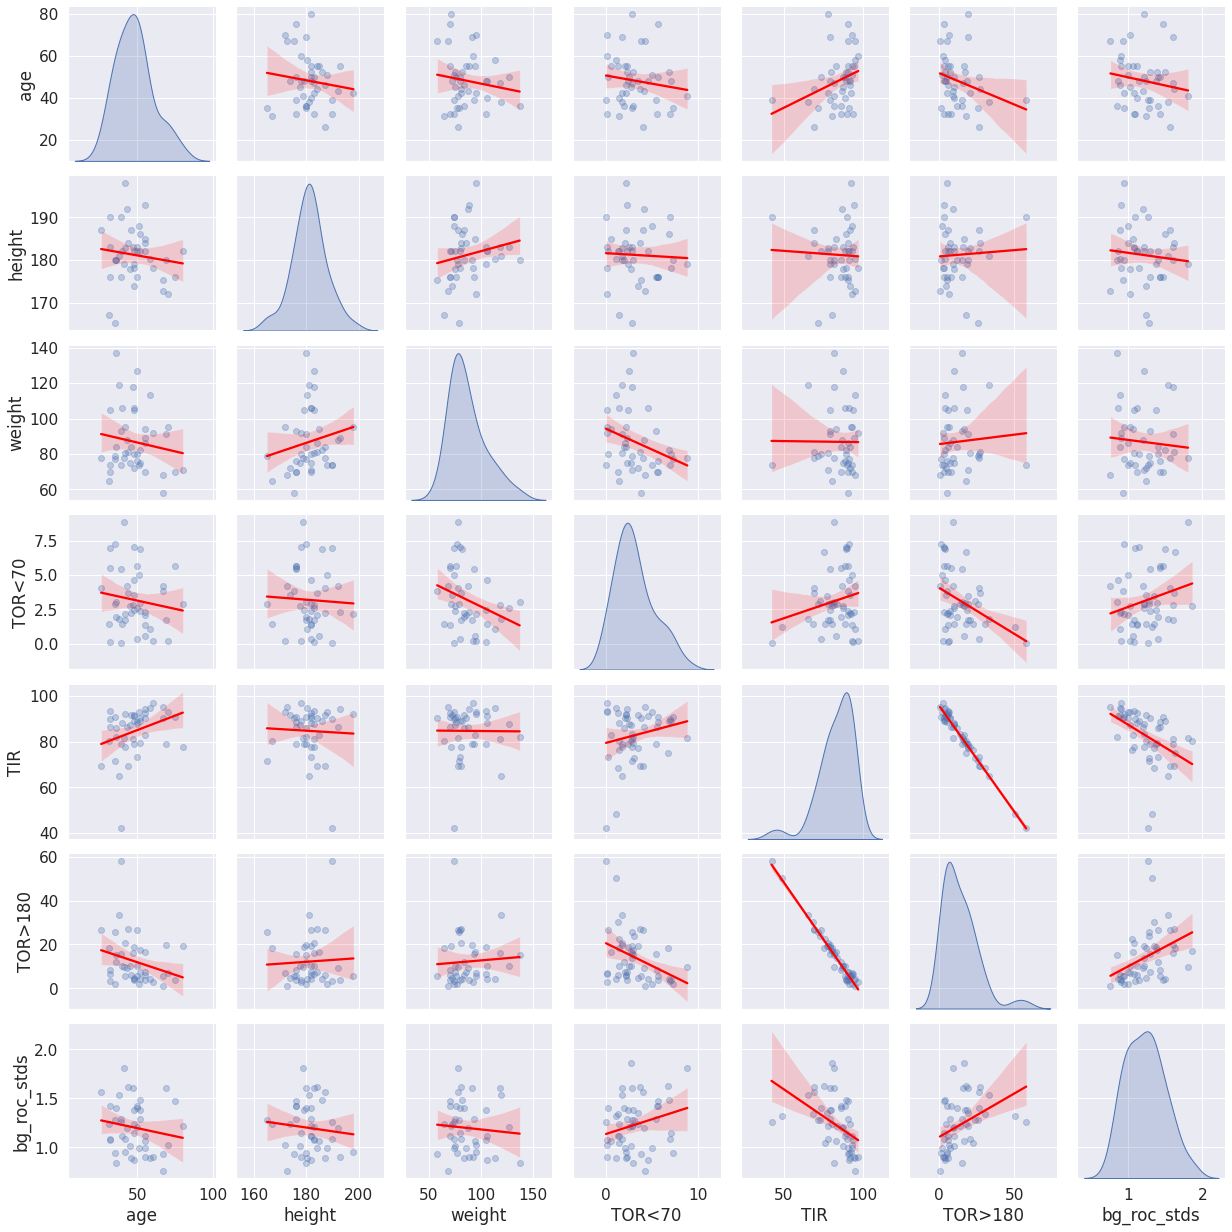

In [12]:
sns.pairplot(df["OPENonOH"][df["OPENonOH"]["gender"]=="Male"], diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})

### Figure 2 b) box and rain plot

In [103]:
df["OpenAPS"]["project"] = "OpenAPS"
df1 = df["OpenAPS"][['project', 'gender', 'age', 'height', 'weight']]
df["OPENonOH"]["project"] = "OPENonOH"
df2 = df["OPENonOH"][['project', 'gender', 'age', 'height', 'weight']]

df_combined = pd.concat([df1, df2], axis=0)
df_combined.reindex(['project','gender', 'age', 'height', 'weight'], axis=1)
print(df_combined)
x = df_combined[['age', 'height', 'weight']].values  #returns a numpy array
for i in range(3):
    print(min(x[:,i]), max(x[:,i]))
df_min = df_combined[['age', 'height', 'weight']].min(axis=0)
df_max = df_combined[['age', 'height', 'weight']].max(axis=0)
print(df_min, df_max)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)

df_scaled.columns = ['age', 'height', 'weight']


extracted_col = df_combined["gender"].to_numpy()
df_scaled.insert(0, "gender", extracted_col)
extracted_col = df_combined["project"].to_numpy()
df_scaled.insert(0, "project", extracted_col)


     project  gender   age    height      weight
0    OpenAPS    Male  46.0  186.8424   73.000000
1    OpenAPS  Female  14.0  146.3040   49.000000
2    OpenAPS     NaN  41.0  167.6400  149.000000
3    OpenAPS    Male  35.0       NaN         NaN
4    OpenAPS    Male  42.0  182.8800  185.000000
..       ...     ...   ...       ...         ...
70  OPENonOH    Male   NaN       NaN         NaN
71  OPENonOH  Female  39.0  165.0000   68.000000
72  OPENonOH  Female  39.0  167.6400   81.646560
73  OPENonOH  Female  32.0  167.6400   58.966960
74  OPENonOH    Male  42.0  182.8800   80.739376

[197 rows x 5 columns]
3.0 80.0
42.672 213.36
49.0 277.0
age        3.000
height    42.672
weight    49.000
dtype: float64 age        80.00
height    213.36
weight    277.00
dtype: float64


### select combinations of projects, gender and vars

In [104]:
# fill dat variable
projects = ["OPENonOH", "OpenAPS"]
gender = ["Female", "Male"]
vars = ["age", "height", "weight"]

dat = {}
column_names = []
for var_ in vars:
    for project_ in projects:        
        for sex_ in gender:
            dat[(var_, project_, sex_)] = df_scaled.loc[(df_scaled.project == project_) & (df_scaled.gender == sex_), var_]
            column_names.append(f"{var_}, {project_}, {sex_[0]}")


Index(['age, OPENonOH, F', 'age, OPENonOH, M', 'age, OpenAPS, F',
       'age, OpenAPS, M', 'height, OPENonOH, F', 'height, OPENonOH, M',
       'height, OpenAPS, F', 'height, OpenAPS, M', 'weight, OPENonOH, F',
       'weight, OPENonOH, M', 'weight, OpenAPS, F', 'weight, OpenAPS, M'],
      dtype='object')


<AxesSubplot:>

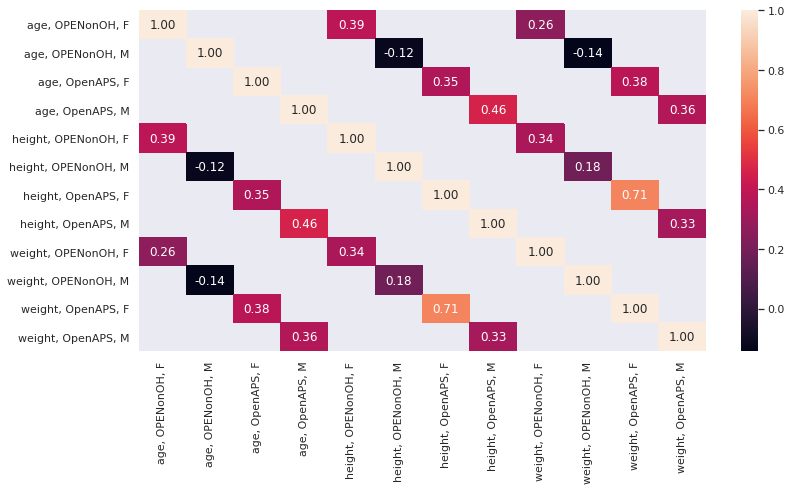

In [105]:
# feature correlations with respect to sex

df1 = pd.concat([dat[k] for k in dat.keys()], axis=1).head(122)

df1.columns = column_names
print(df1.columns)
sns.heatmap(df1.corr(), annot=True, fmt=".2f")

Text(9.5, 1.05, 'max=277.0 kg')

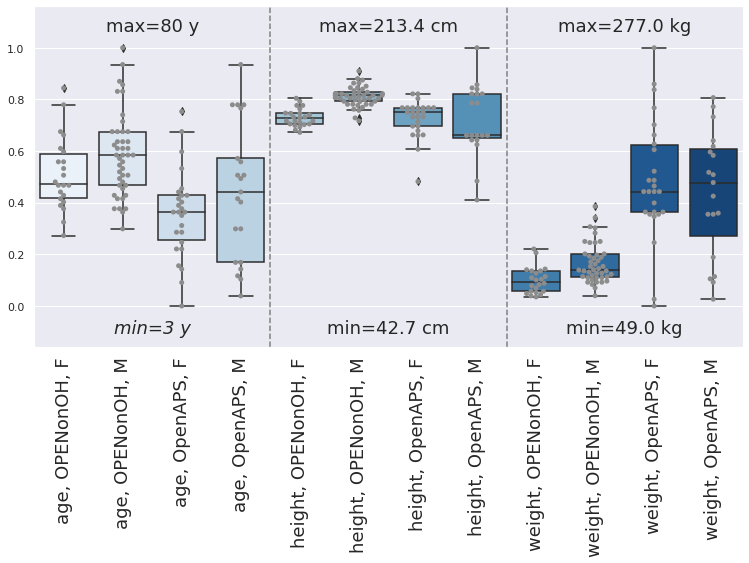

In [112]:
# distributions in age, height, weight across projects and gender
sns.set(rc={'figure.figsize':(12.7,6.27)})

ax = sns.swarmplot(data=df1, color=".55")
ax = sns.boxplot(data=df1, palette="Blues")
plt.scatter(x=[3.5,3.5],y=[-0.1,1.1], color='lightgrey', marker='o', s=0)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
#ax.set_ylim(-0.1, 1.1)
#for i in range(12):
#    plt.axvline(x=i, color='r', linestyle='--')
plt.axvline(x=3.5, color='grey', linestyle='--')
plt.axvline(x=7.5, color='grey', linestyle='--')
ax.tick_params(axis='x', rotation=90)
plt.text(1.5, -0.05, f"min={int(df_min.loc['age'])} y", horizontalalignment='center', verticalalignment='top', fontstyle='italic', fontsize=18)
plt.text(4+1.5, -0.05, f"min={df_min.loc['height']:0.1f} cm", horizontalalignment='center', verticalalignment='top', fontsize=18)
plt.text(8+1.5, -0.05, f"min={df_min.loc['weight']:0.1f} kg", horizontalalignment='center', verticalalignment='top', fontsize=18)
plt.text(1.5, 1.05, f"max={int(df_max.loc['age'])} y", horizontalalignment='center', verticalalignment='bottom', fontsize=18)
plt.text(4+1.5, 1.05, f"max={df_max.loc['height']:0.1f} cm", horizontalalignment='center', verticalalignment='bottom', fontsize=18)
plt.text(8+1.5, 1.05, f"max={df_max.loc['weight']:0.1f} kg", horizontalalignment='center', verticalalignment='bottom', fontsize=18)

ValueError: Could not interpret input 'score'

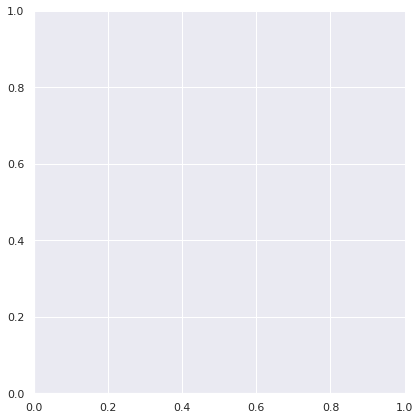

In [49]:
# distributions in age, height, weight across projects and gender

# Rainclouds with FacetGrid
g = sns.FacetGrid(df1, height = 6)
g = g.map_dataframe(pt.RainCloud, x = "age", y = "score", data = df1,
                    orient = "h")

g.fig.subplots_adjust(top=0.75)
g.fig.suptitle("Figure P13\n Using FacetGrid for More Complex Designs",  fontsize=26)
if savefigs:
    plt.savefig('../figs/tutorial_python/figureP13.png', bbox_inches='tight')